In [5]:
from robosuite.robots import register_robot_class
from robosuite.models.robots import Kinova3
import robosuite as suite
from robosuite.controllers import load_composite_controller_config
import mujoco

@register_robot_class("WheeledRobot")
class MobileKinova(Kinova3):
    @property # the property alwasys return the string "OmronMobileBase" and can be called without parentheses
    def default_base(self):
        return "OmronMobileBase"

    # @property
    # def default_arms(self):
    #     return {"right": "Kinova3"}

# Create environment
env = suite.make(
    env_name="Lift",
    robots=[],
    controller_configs=load_composite_controller_config(controller="BASIC"),
    has_renderer=True,
    has_offscreen_renderer=False,
    render_camera="agentview",
    use_camera_obs=False,
    control_freq=20,
)

# Run the simulation, and visualize it
env.reset()
mujoco.viewer.launch(env.sim.model._model, env.sim.data._data)

[robosuite INFO] Loading controller configuration from: /home/ckong35/workspaces/robosuite/robosuite/controllers/config/default/composite/basic.json (composite_controller_factory.py:121)


IndexError: list index out of range

In [7]:
from robosuite.robots import register_robot_class
from robosuite_models.robots import Yumi
import robosuite as suite
from robosuite.controllers import load_composite_controller_config
import mujoco

@register_robot_class("WheeledRobot")
class MobileYumi(Yumi):
    @property # the property alwasys return the string "OmronMobileBase" and can be called without parentheses
    def default_base(self):
        return "OmronMobileBase"

    # def set_base_xpos(self, xpos):
    #     # Convert tuple to list to modify it
    #     xpos = list(xpos)
    #     # Move the base 0.3 meters above the current location
    #     xpos[2] += 0.3
    #     # Convert back to tuple if necessary
    #     xpos = tuple(xpos)
    #     super().set_base_xpos(xpos)


# Create environment
env = suite.make(
    env_name="Lift",
    robots="MobileYumi",
    controller_configs=load_composite_controller_config(controller="BASIC"),
    has_renderer=True,
    has_offscreen_renderer=False,
    render_camera="agentview",
    use_camera_obs=False,
    control_freq=20,
)

# Run the simulation, and visualize it
env.reset()
mujoco.viewer.launch(env.sim.model._model, env.sim.data._data)

[robosuite INFO] Loading controller configuration from: /home/ckong35/workspaces/robosuite/robosuite/controllers/config/default/composite/basic.json (composite_controller_factory.py:121)
[robosuite WARNING] The config has defined for the controller "head", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for head from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "legs", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for legs from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "head", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for head from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "legs", but the rob

(01/21/25) The file of the vention base has been centered and converted to STL, tomorrow will include it into the xml file. Might want to investigate why the addition of mobile base is bad all fixed

In [6]:
from robosuite.robots import register_robot_class
from robosuite.models.robots import DualKinova3
import robosuite as suite
from robosuite.controllers import load_composite_controller_config
import mujoco

@register_robot_class("WheeledRobot")
class MobileKinova(DualKinova3):
    @property # the property alwasys return the string "OmronMobileBase" and can be called without parentheses
    def default_base(self):
        return "OmronMobileBase"


# Create environment
env = suite.make(
    env_name="Lift",
    # robots="MobileKinova",
    robots="DualKinova3",
    controller_configs=load_composite_controller_config(controller="BASIC"),
    has_renderer=True,
    has_offscreen_renderer=False,
    render_camera="frontview",
    use_camera_obs=False,
    control_freq=20,
)

# Run the simulation, and visualize it
env.reset()
mujoco.viewer.launch(env.sim.model._model, env.sim.data._data)

[robosuite INFO] Loading controller configuration from: /home/ckong35/workspaces/robosuite/robosuite/controllers/config/robots/default_dualkinova3.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /home/ckong35/workspaces/robosuite/robosuite/controllers/config/robots/default_dualkinova3.json (composite_controller_factory.py:121)


(01/22/25) Next explore controller and see if I can use the manipulability elipsoid to generate trajectory that smack a point in 3d space 

Testing simulation speed and opt timestep seems to be getting in the way here

[robosuite INFO] Loading controller configuration from: /home/ckong35/workspaces/robosuite/robosuite/controllers/config/robots/default_dualkinova3.json (composite_controller_factory.py:121)


optimal timestep: 0.002


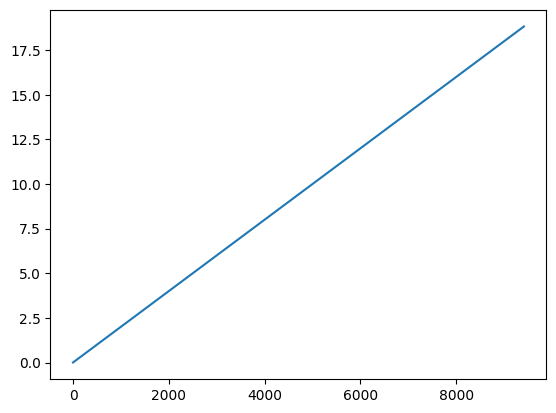

In [7]:
from robosuite.robots import register_robot_class
from robosuite.models.robots import DualKinova3
import robosuite as suite
from robosuite.controllers import load_composite_controller_config
from robosuite.models.objects import LemonObject, BounceballObject
import mujoco
import time
import numpy as np

@register_robot_class("WheeledRobot")
class MobileKinova(DualKinova3):
    @property # the property alwasys return the string "OmronMobileBase" and can be called without parentheses
    def default_base(self):
        return "OmronMobileBase"


# Create environment
env = suite.make(
    env_name="Lift",
    # robots="MobileKinova",
    robots="DualKinova3",
    # controller_configs=load_composite_controller_config(controller="BASIC"),
    has_renderer=True,
    has_offscreen_renderer=False,
    render_camera="frontview",
    use_camera_obs=False,
    control_freq=20,
)
ball = BounceballObject(
    name
    ="bounceball", # has to match the model="bounceball" in the xml file
)
# Get model and data
model = env.sim.model._model
data = env.sim.data._data

# Set smaller timestep for more accurate physics simulation
# model.opt.timestep = 0.05  # 0.5ms timestep




# Lists to store time, force and position data
times = []
forces = []
z_positions = []
contact_object = 'bounceball_g0'
simulation_time = 20

# ball_body_id = env.sim.model.body_name2id('bounceball_main')

with mujoco.viewer.launch_passive(model, data) as viewer:
    # Set initial camera parameters
    viewer.cam.distance = 3.0
    viewer.cam.azimuth = 90
    viewer.cam.elevation = -45
    viewer.cam.lookat[:] = np.array([0.0, -0.25, 0.824])

    start = time.time()
    while viewer.is_running() and time.time() - start < simulation_time:
        step_start = time.time()
        
        # data.ctrl[:] = 0  # Disable controller
        
        # env._apply_gravity_compensation()

        ####Controlling the ball ######
        # Apply a force to the ball
        
        # Step the simulation
        env.sim.step()
        # mujoco.mj_step(model, data)
        # env.step(someaction)
        # next learn how to use joint position control to hold the robot
        
        total_force = 0
        # # Iterate over all detected contacts
        # for i in range(data.ncon):
        #     contact = data.contact[i]
        #     # Check if contact involves the table and the object of interest
        #     if ((contact.geom1 == env.sim.model.geom_name2id('table_collision') and 
        #         contact.geom2 == env.sim.model.geom_name2id(contact_object)) or
        #         (contact.geom2 == env.sim.model.geom_name2id('table_collision') and 
        #         contact.geom1 == env.sim.model.geom_name2id(contact_object))):
                
        #         # Compute contact force (6D: 3D force + 3D torque)
        #         force_vector = np.zeros(6)
        #         mujoco.mj_contactForce(model, data, i, force_vector)
                
        #         # Extract normal force (first component in the contact frame)
        #         normal_force = force_vector[0]
        #         total_force += normal_force
        
        # # Record positions, times, and forces
        # ball_body_id = env.sim.model.body_name2id('bounceball_ball')
        # z_positions.append(data.xpos[ball_body_id][2])
        times.append(data.time)
        # forces.append(total_force)  # This now includes the spike
        
        # Viewer updates (unchanged)
        with viewer.lock():
            viewer.opt.flags[mujoco.mjtVisFlag.mjVIS_CONTACTPOINT] = 1

        viewer.sync()
        
        # Maintain real-time simulation
        time_until_next_step = model.opt.timestep - (time.time() - step_start)
        if time_until_next_step > 0:
            time.sleep(time_until_next_step)

import matplotlib.pyplot as plt
# plot time
plt.plot(times)
print('optimal timestep:', model.opt.timestep)